# Fritsch Solition
Author: Joshua D. JOHN
Date: 2024/07/21

This is an implementation of Fritsch Solitons. What I am calling the Fritsch method is a way to create dark solitons at arbitrary position and velocity by simultaneously engineering the amplitude and phase of the condensate wave function. This is introduced as a better approach compared to the technique demonstrated before, which manipulated the condensate phase only.

* Fritsch, A.R., Lu, M., Reid, G., Piñeiro, A., & Spielman, I.B. (2020). _Creating solitons with controllable and near-zero velocity in Bose-Einstein condensates._ Physical review. A, 101 5.


In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory, QuantumMatter
from IPython.display import HTML
from matplotlib import pyplot as plt
from copy import deepcopy
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d


qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│           100 │               100 │                100 │                 36 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [3]:
from FritschSolitonsPkg.FritschSoliton import FritschSolitonMatter

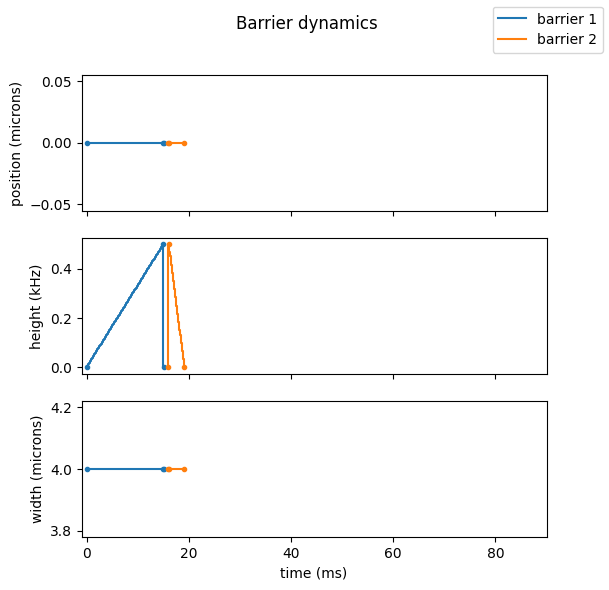

In [4]:
fs = FritschSolitonMatter(qmf, 0.5, 2.0, 10.0)
fs_matter = fs.get_matter()
fs_matter.show_barrier_dynamics()

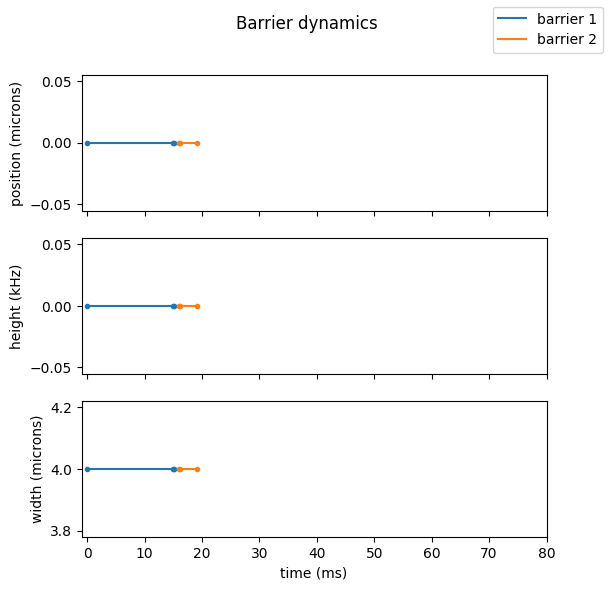

In [5]:
norm_matter = FritschSolitonMatter(qmf, 0.0, 1.0, 0.0).get_matter()
norm_matter.show_barrier_dynamics()

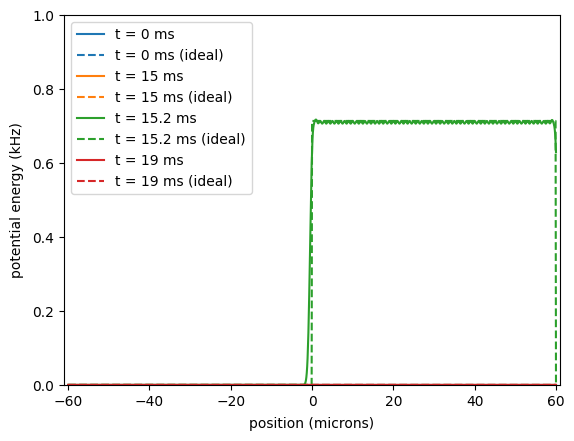

In [6]:
norm_matter.show_potential(times=[0, 15, 15.2, 19],  ylimits=[0, 1], include_magnetic=False, include_ideal=True)

In [7]:
norm_matter.name

'fritsch sol'

In [12]:
hold_times = np.arange(0, 20, 2)
hold_times

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [16]:
hold_time_exp_matters = [FritschSolitonMatter(qmf, hold_time=float(ht), matter_name="hold_time_" + str(ht)).get_matter() for ht in hold_times]

In [18]:
hold_time_exp_matters[0].name

'hold_time_0'

In [19]:
sim = True
track = False
if sim == False:
    track = True
[matter.submit(track=track, sim=sim) for matter in hold_time_exp_matters]

submitted simulation
submitted simulation
submitted simulation
submitted simulation
submitted simulation
submitted simulation
submitted simulation
submitted simulation
submitted simulation
submitted simulation


[None, None, None, None, None, None, None, None, None, None]

In [20]:
[matter.get_result() for matter in hold_time_exp_matters]

ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                     
time-of-flight simulation in progress              
Simulation complete.d TOF  94.914 of 95.000ms          
ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                     
time-of-flight simulation in progress              
Simulation complete.d TOF  96.914 of 97.000ms          
ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                     
time-of-flight simulation in progress              
Condensate hit right boundary at time:   97.79978776087727
Simulation complete.d TOF  98.914 of 99.000ms         
Results may be invalid after atoms reached simulation boundaries. Consider 

[None, None, None, None, None, None, None, None, None, None]

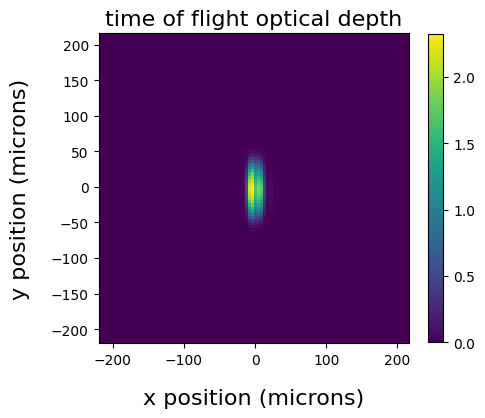

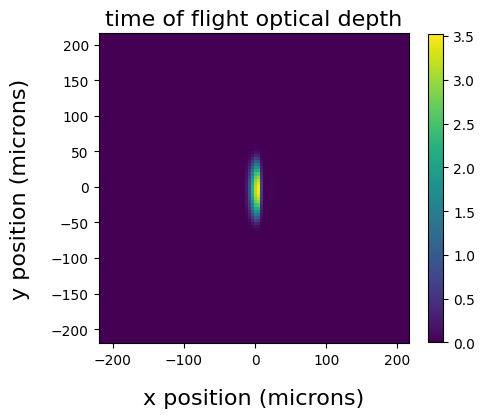

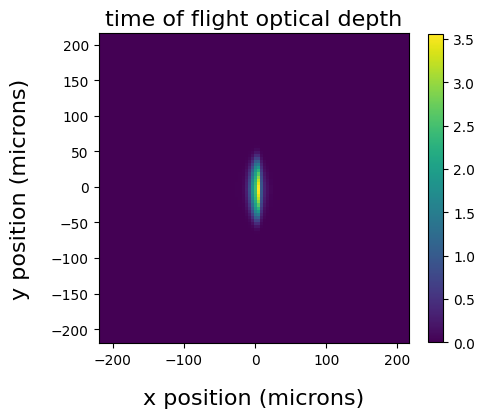

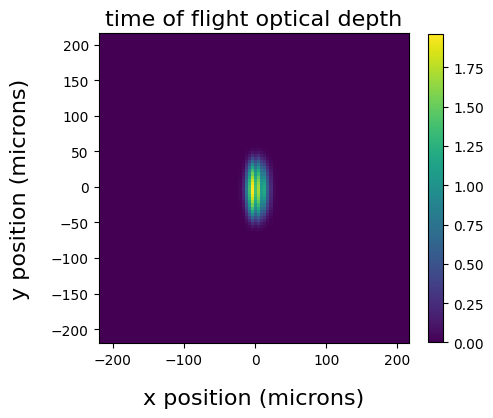

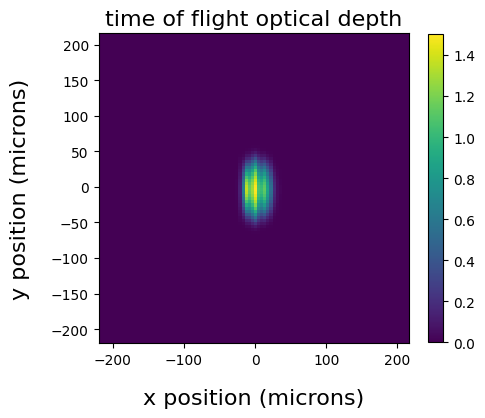

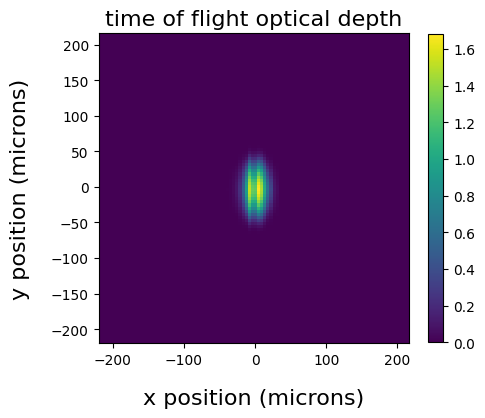

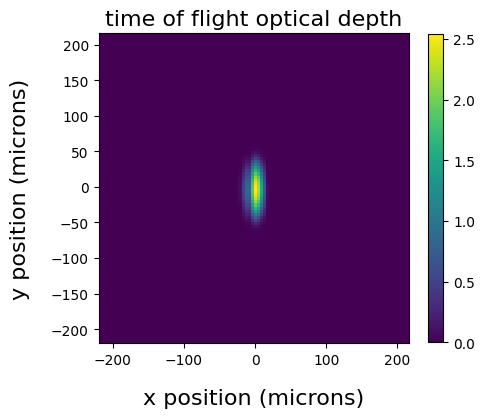

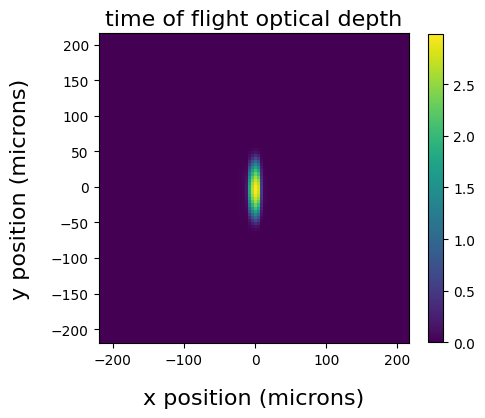

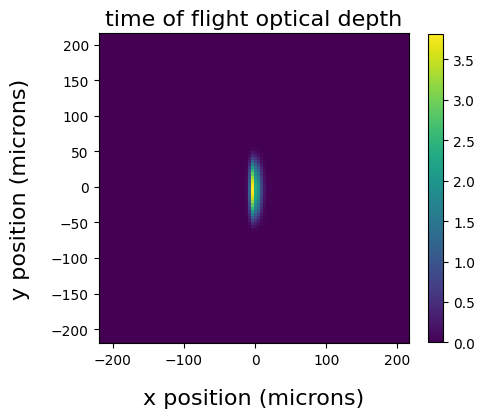

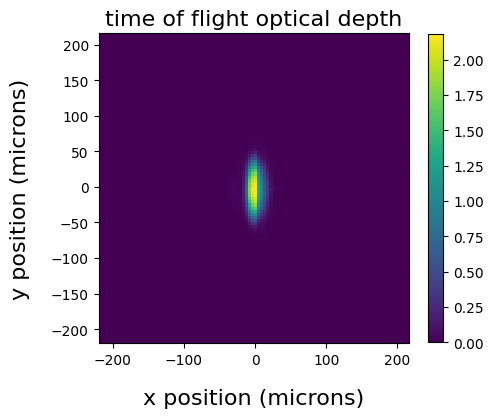

In [24]:
for matter in hold_time_exp_matters:
    matter.output.plot_tof(figsize=(5, 5))

In [33]:
# Experiment
repeats = 3
hold_times = np.arange(0,20,2)
jobs_list = []
for ht in hold_times:
    for rep in range(repeats):
        name = "hold_time_" + str(ht) + "_rep_" + str(rep)
        jobs_list.append(FritschSolitonMatter(qmf, 
                                              hold_time=float(ht), 
                                              matter_name=name
                                             ).get_matter())


In [35]:
jobs_list[1].name

'hold_time_0_rep_1'